In [1]:
import os
import itertools
import math

from collections import defaultdict
from itertools import product

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns


plt.style.use(["science"])

In [2]:
results_folder = "../results/drift/"
models = os.listdir(results_folder)
models = ["MLP", "LSTM", "CNN", "TCN"]
datasets = [d.replace(".csv", "") for d in os.listdir(results_folder + models[0])]
print(
    f"{len(models)} models and {len(datasets)} datasets\n",
    f'\tmodels: {", ".join(models)}\n',
    f'\tdatasets: {", ".join(datasets)}',
)

colors_list = ["#0051a2", "#ffd44f", "#f4777f", "#93003a", "#97964a"]
colors = {m: colors_list[i] for i, m in enumerate(models)}

data = defaultdict(dict)
for d, m in itertools.product(datasets, models):
    df = pd.read_csv("{}/{}/{}.csv".format(results_folder, m, d))
    data[d][m] = df.copy()

4 models and 15 datasets
 	models: MLP, LSTM, CNN, TCN
 	datasets: RTGg3, ARGWg-F2F5F8, ARGWg-F1F4, ARGWa-F1F4, SEAa-F2F4, RTGg, LED-4, RTGg6, RTGa3, RTGa6, SEAg-F2F4, RBFi-slow, RBFi-fast, ARGWa-F2F5F8, RTGa


In [3]:
means = {d: {m: data[d][m].metric.mean() for m in models} for d in datasets}
pd.DataFrame(means).T

,MLP,LSTM,CNN,TCN
RTGg3,0.428905,0.504605,0.426727,0.474825
ARGWg-F2F5F8,0.839970,0.829346,0.796766,0.837164
ARGWg-F1F4,0.858253,0.867582,0.859740,0.891640
ARGWa-F1F4,0.922944,0.919331,0.912202,0.942970
SEAa-F2F4,0.923695,0.895591,0.914209,0.902336
RTGg,0.805518,0.781545,0.731864,0.833957
LED-4,0.657965,0.615732,0.628390,0.616705
RTGg6,0.437639,0.354883,0.363309,0.494962
RTGa3,0.609650,0.697354,0.474154,0.686295
RTGa6,0.521445,0.506287,0.424005,0.553516


## Plot Results

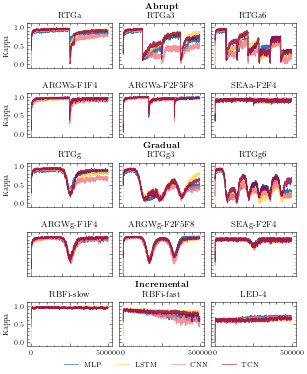

In [4]:
plt.rcParams.update({"font.size": 7})

fig_width_pt = 347.12354 * 1.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inches
golden_mean = (math.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = 2.0 * fig_width * golden_mean  # height in inches
fig_size = [fig_width, fig_height]

selected_datasets = [
    "RTGa",
    "RTGa3",
    "RTGa6",
    "ARGWa-F1F4",
    "ARGWa-F2F5F8",
    "SEAa-F2F4",
    "RTGg",
    "RTGg3",
    "RTGg6",
    "ARGWg-F1F4",
    "ARGWg-F2F5F8",
    "SEAg-F2F4",
    "RBFi-slow",
    "RBFi-fast",
    "LED-4",
]

fig, big_axes = plt.subplots(nrows=5, ncols=1, figsize=fig_size)
for row, big_ax in enumerate(big_axes, start=0):
    if row == 0:
        big_ax.set_title("Abrupt", fontsize=8)
    if row == 2:
        big_ax.set_title("Gradual", fontsize=8)
    if row == 4:
        big_ax.set_title("Incremental", fontsize=8)
    # Turn off axis lines and ticks of the big subplot
    # obs alpha is 0 in RGBA string!
    # big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    # big_ax._frameon = False


subplots = [
    ((5, 6), (0, 0), 2, "y"),
    ((5, 6), (0, 2), 2, "t-Abrupt"),
    ((5, 6), (0, 4), 2, ""),
    ((5, 6), (1, 0), 2, "y"),
    ((5, 6), (1, 2), 2, ""),
    ((5, 6), (1, 4), 2, ""),
    ((5, 6), (2, 0), 2, "y"),
    ((5, 6), (2, 2), 2, "t-Gradual"),
    ((5, 6), (2, 4), 2, ""),
    ((5, 6), (3, 0), 2, ""),
    ((5, 6), (3, 2), 2, ""),
    ((5, 6), (3, 4), 2, ""),
    ((5, 6), (4, 0), 2, "yx"),
    ((5, 6), (4, 2), 2, "xt-Incremental"),
    ((5, 6), (4, 4), 2, "x"),
]

ax = []
for sh, loc, colspan, opt in subplots:
    axi = plt.subplot2grid(sh, loc, colspan=colspan, fig=fig)

    axi.set_xticklabels([])
    axi.set_yticklabels([])
    axi.set_ylim(-0.1, 1.1)
    axi.set_yticks([0.0, 0.5, 1.0])

    if "x" in opt:
        axi.set_xticks([int(j / 2 * 100000) for j in range(11)], minor=True)
        axi.set_xticks([0, 250e3, 500e3], minor=False)
        axi.set_xticklabels([str(0), "", str(int(500e3))])
    if "y" in opt:
        axi.set_ylabel("Kappa")
        axi.set_yticklabels(["0.0", "0.5", "1.0"])

    ax.append(axi)


for i, d in enumerate(selected_datasets):
    if i == 1:
        ax[i].set_title(r"\textbf{Abrupt}" + "\n" + d)
    elif i == 7:
        ax[i].set_title(r"\textbf{Gradual}" + "\n" + d)
    elif i == 13:
        ax[i].set_title(r"\textbf{Incremental}" + "\n" + d)
    else:
        ax[i].set_title(d)
    for m in models:
        ax[i].plot(
            data[d][m].instances,
            data[d][m].metric,
            label=m,
            c=colors[m],
            linewidth=0.7,
            alpha=0.8,
        )

ax[0].legend(ncol=len(models), loc=(0.4, -6.85))

plt.subplots_adjust(hspace=0.575)
# plt.tight_layout()
fig.savefig("images/drift-results-all.png", format="png", dpi=500)
plt.show()

<ipython-input-5-c1d909fe015a>:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


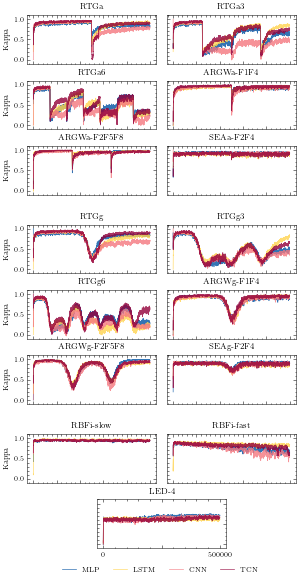

In [5]:
plt.rcParams.update({"font.size": 7})

fig_width_pt = 347.12354 * 1.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inches
golden_mean = (math.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = 3.5 * fig_width * golden_mean  # height in inches
fig_size = [fig_width, fig_height]

selected_datasets = [
    "RTGa",
    "RTGa3",
    "RTGa6",
    "ARGWa-F1F4",
    "ARGWa-F2F5F8",
    "SEAa-F2F4",
    "RTGg",
    "RTGg3",
    "RTGg6",
    "ARGWg-F1F4",
    "ARGWg-F2F5F8",
    "SEAg-F2F4",
    "RBFi-slow",
    "RBFi-fast",
    "LED-4",
]

n = 3  # number of double-rows
m = 4  # number of columns

t = 0.9  # 1-t == top space
b = 0.1  # bottom space      (both in figure coordinates)

msp = 0.3  # minor spacing
sp = 1.0  # major spacing

offs = (1 + msp) * (t - b) / (3 * n + n * msp + (n - 1) * sp)  # grid offset
hspace = sp + msp + 2  # height space per grid

gso = GridSpec(n, m, bottom=b + 2 * offs, top=t, hspace=hspace)
gse = GridSpec(n, m, bottom=b + offs, top=t - offs, hspace=hspace)
gsl = GridSpec(n, m, bottom=b, top=t - 2 * offs, hspace=hspace)

subplots = [
    (gso, 0, 2, "y"),
    (gso, 2, 2, ""),
    (gse, 0, 2, "y"),
    (gse, 2, 2, ""),
    (gsl, 0, 2, "y"),
    (gsl, 2, 2, ""),
    (gso, 4, 2, "y"),
    (gso, 6, 2, ""),
    (gse, 4, 2, "y"),
    (gse, 6, 2, ""),
    (gsl, 4, 2, "y"),
    (gsl, 6, 2, ""),
    (gso, 8, 2, "y"),
    (gso, 10, 2, ""),
    (gse, 9, 2, "x"),
]

fig = plt.figure(figsize=fig_size)
ax = []
for (gs, idx, ncol, opt), d in zip(subplots, selected_datasets):
    axi = fig.add_subplot(gs[idx : idx + ncol])

    axi.set_xticklabels([])
    axi.set_yticklabels([])
    axi.set_ylim(-0.1, 1.1)
    axi.set_yticks([0.0, 0.5, 1.0])

    axi.set_title(d)
    for m in models:
        axi.plot(
            data[d][m].instances,
            data[d][m].metric,
            label=m,
            c=colors[m],
            linewidth=0.7,
            alpha=0.8,
        )

    if "x" in opt:
        axi.set_xticks([int(j / 2 * 100000) for j in range(11)], minor=True)
        axi.set_xticks([0, 250e3, 500e3], minor=False)
        axi.set_xticklabels([str(0), "", str(int(500e3))])
    if "y" in opt:
        axi.set_ylabel("Kappa")
        axi.set_yticklabels(["0.0", "0.5", "1.0"])
    if "t" in opt:
        axi.set_title(
            r"\normalsize\textbf{-- " + opt.split("-")[-1] + " --}" + "\n" + d
        )

    ax.append(axi)


ax[0].legend(ncol=len(models), loc=(0.25, -10.5))

plt.subplots_adjust(hspace=0.575)
plt.tight_layout()
fig.savefig("images/drift-results-all-2.png", format="png", dpi=500)
plt.show()

## Separated images for each drift type

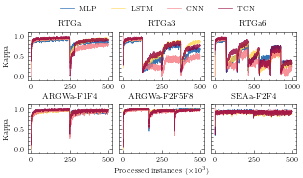

In [6]:
# -- ABRUPT --
plt.rcParams.update({"font.size": 7})

fig_width_pt = 347.12354 * 1.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inches
golden_mean = (math.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = 0.75 * fig_width * golden_mean  # height in inches
fig_size = [fig_width, fig_height]

selected_datasets = [
    "RTGa",
    "RTGa3",
    "RTGa6",
    "ARGWa-F1F4",
    "ARGWa-F2F5F8",
    "SEAa-F2F4",
]


fig = plt.figure(figsize=fig_size)
gs = GridSpec(2, 3 * 2)

ax = []
for i, d in enumerate(selected_datasets):
    axi = fig.add_subplot(gs[i * 2 : (i * 2 + 2)])
    axi.set_title(d)
    for m in models:
        axi.plot(
            data[d][m].instances / 1000,
            data[d][m].metric,
            label=m,
            c=colors[m],
            linewidth=0.7,
            alpha=0.8,
        )
    axi.set_ylim((-0.1, 1.1))
    axi.set_xticks([0, 250, 500])
    axi.set_xticklabels([0, 250, 500])
    if i == 2:  # RTGa6
        axi.set_xticks([0, 500, 1000])
        axi.set_xticklabels([0, 500, 1000])

    ax.append(axi)

ax[0].set_ylabel("Kappa")
ax[3].set_ylabel("Kappa")

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[4].set_yticklabels([])
ax[5].set_yticklabels([])

ax[4].set_xlabel(r"Processed instances ($\times 10^3$)")

plt.subplots_adjust(hspace=0.5)

ax[0].legend(
    ncol=len(models), loc=(0.35, 1.35), frameon=False, fancybox=False, shadow=True
)

plt.savefig("images/abrupt_drift.pdf", dpi=500)

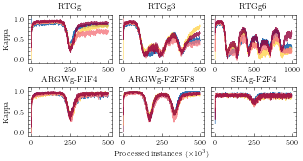

In [7]:
# -- Gradual --
plt.rcParams.update({"font.size": 7})

fig_width_pt = 347.12354 * 1.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inches
golden_mean = (math.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = 0.75 * fig_width * golden_mean  # height in inches
fig_size = [fig_width, fig_height]

selected_datasets = [
    "RTGg",
    "RTGg3",
    "RTGg6",
    "ARGWg-F1F4",
    "ARGWg-F2F5F8",
    "SEAg-F2F4",
]


fig = plt.figure(figsize=fig_size)
gs = GridSpec(2, 3 * 2)

ax = []
for i, d in enumerate(selected_datasets):
    axi = fig.add_subplot(gs[i * 2 : (i * 2 + 2)])
    axi.set_title(d)
    for m in models:
        axi.plot(
            data[d][m].instances / 1000,
            data[d][m].metric,
            label=m,
            c=colors[m],
            linewidth=0.7,
            alpha=0.8,
        )
    axi.set_ylim((-0.1, 1.1))
    axi.set_xticks([0, 250, 500])
    axi.set_xticklabels([0, 250, 500])
    if i == 2:  # RTGa6
        axi.set_xticks([0, 500, 1000])
        axi.set_xticklabels([0, 500, 1000])

    ax.append(axi)

ax[0].set_ylabel("Kappa")
ax[3].set_ylabel("Kappa")

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[4].set_yticklabels([])
ax[5].set_yticklabels([])

ax[4].set_xlabel(r"Processed instances ($\times 10^3$)")

plt.subplots_adjust(hspace=0.5)

plt.savefig("images/gradual_drift.pdf", dpi=500)

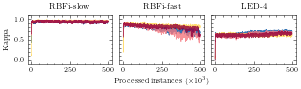

In [8]:
# -- Incremental --
plt.rcParams.update({"font.size": 7})

fig_width_pt = 347.12354 * 1.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inches
golden_mean = (math.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = 0.75 * fig_width * golden_mean  # height in inches
fig_size = [fig_width, fig_height]

selected_datasets = ["RBFi-slow", "RBFi-fast", "LED-4"]


fig = plt.figure(figsize=fig_size)
gs = GridSpec(2, 3 * 2)

ax = []
for i, d in enumerate(selected_datasets):
    axi = fig.add_subplot(gs[i * 2 : (i * 2 + 2)])
    axi.set_title(d)
    for m in models:
        axi.plot(
            data[d][m].instances / 1000,
            data[d][m].metric,
            label=m,
            c=colors[m],
            linewidth=0.7,
            alpha=0.8,
        )
    axi.set_ylim((-0.1, 1.1))
    axi.set_xticks([0, 250, 500])
    axi.set_xticklabels([0, 250, 500])

    ax.append(axi)

ax[0].set_ylabel("Kappa")

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])

ax[1].set_xlabel(r"Processed instances ($\times 10^3$)")

plt.subplots_adjust(hspace=0.5)

plt.savefig("images/incremental_drift.pdf", dpi=500)

## Attempt to create a metric for drift recovery

,Model,Metric
0,MLP,0.06006
1,LSTM,0.10010
2,CNN,0.26026
3,TCN,0.05005


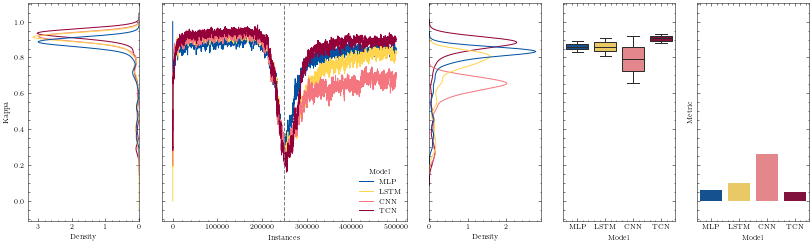

In [9]:
from scipy import stats
import numpy as np

_data = []
for m in models:
    for row in data["RTGg"][m].values:
        _data.append([row[1], row[2], m])
_data = pd.DataFrame(_data, columns=["Instances", "Kappa", "Model"])


def estimate_maxima(data):
    kde = stats.gaussian_kde(data)
    no_samples = 1000
    samples = np.linspace(0, 10, no_samples)
    probs = kde.evaluate(samples)
    maxima_index = probs.argmax()
    maxima = samples[maxima_index]
    return maxima


drift = 250e3
df_metric = pd.DataFrame(columns=["Model", "Metric"])
df_metric_abs = pd.DataFrame(columns=["Model", "Metric"])

for m in models:
    mean1 = estimate_maxima(
        _data[(_data["Model"] == m) & (_data["Instances"] <= drift)].Kappa
    )
    mean2 = estimate_maxima(
        _data[(_data["Model"] == m) & (_data["Instances"] >= drift)].Kappa
    )
    mean_diff = max(mean1, mean2) - min(mean1, mean2)
    df_metric = df_metric.append({"Model": m, "Metric": mean1}, ignore_index=True)
    df_metric = df_metric.append({"Model": m, "Metric": mean2}, ignore_index=True)
    df_metric_abs = df_metric_abs.append(
        {"Model": m, "Metric": mean_diff}, ignore_index=True
    )
display(df_metric_abs)

hue_order = ["MLP", "LSTM", "CNN", "TCN"]

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(14, 4), sharey=True)
gs = ax[1].get_gridspec()
ax[1].remove()
ax[2].remove()
axbig = fig.add_subplot(gs[1:3])

sns.kdeplot(
    y="Kappa",
    data=_data[_data["Instances"] <= drift],
    hue="Model",
    ax=ax[0],
    hue_order=hue_order,
    palette=colors,
)
sns.kdeplot(
    y="Kappa",
    data=_data[_data["Instances"] >= drift],
    hue="Model",
    ax=ax[3],
    hue_order=hue_order,
    palette=colors,
)
sns.boxplot(
    x="Model", y="Metric", data=df_metric, ax=ax[4], hue_order=hue_order, palette=colors
)
sns.barplot(
    x="Model",
    y="Metric",
    data=df_metric_abs,
    ax=ax[5],
    hue_order=hue_order,
    palette=colors,
)
sns.lineplot(
    x="Instances",
    y="Kappa",
    data=_data,
    hue="Model",
    ax=axbig,
    hue_order=hue_order,
    palette=colors,
)
axbig.axvline(x=drift, linestyle="--", color="grey")


ax[0].get_legend().remove()
ax[3].get_legend().remove()
ax[0].invert_xaxis()
ax[3].set_ylabel("")
ax[4].set_ylabel("")
axbig.set_ylim(ax[0].get_ylim())
axbig.set_yticklabels([])
axbig.set_ylabel("")
plt.savefig("images/drift_evaluation_metric.png", dpi=500)
plt.show()